<a href="https://colab.research.google.com/github/soumik12345/Zero-DCE/blob/master/notebooks/Zero_DCE_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Nov 15 16:32:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P8    12W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!git clone https://github.com/soumik12345/Zero-DCE
%cd Zero-DCE

Cloning into 'Zero-DCE'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 118 (delta 69), reused 70 (delta 27), pack-reused 0
Receiving objects: 100% (118/118), 2.02 MiB | 27.24 MiB/s, done.
Resolving deltas: 100% (69/69), done.
/content/Zero-DCE


In [2]:
%cd Zero-DCE

/content/Zero-DCE


In [3]:
from glob import glob
from zero_dce import (
    download_dataset, init_wandb,
    Trainer, plot_result
)

In [5]:
download_dataset(dataset_tag='dark_face')

Downloading...
From: https://drive.google.com/uc?id=11KaOhxcOh68_NyZwacBoabEJ6FgPCsnQ
To: /content/Zero-DCE/DarkPair.zip
580MB [00:15, 36.6MB/s]


Unpacking Dataset
Done!!!


In [4]:
trainer = Trainer()
image_files = glob('./Low/*.png')
trainer.build_model(pretrain_weights='./model200.pth')

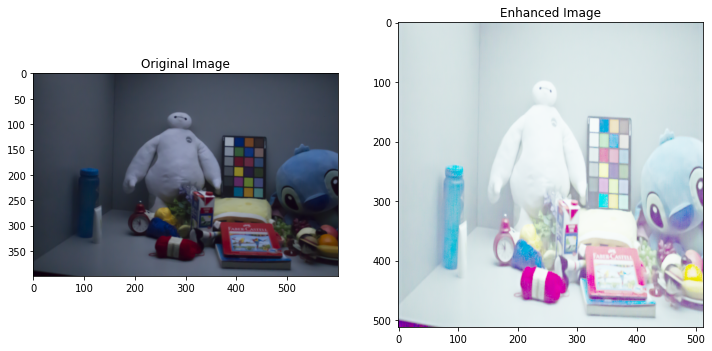

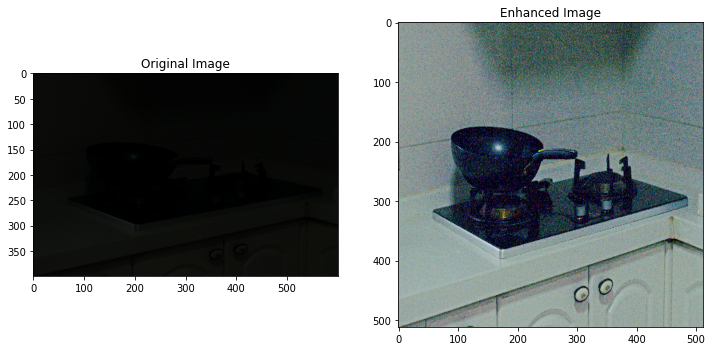

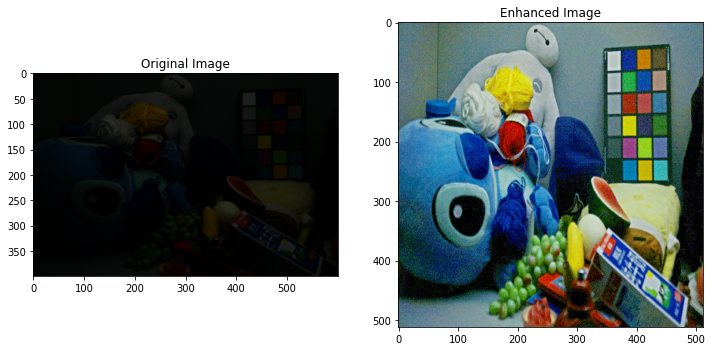

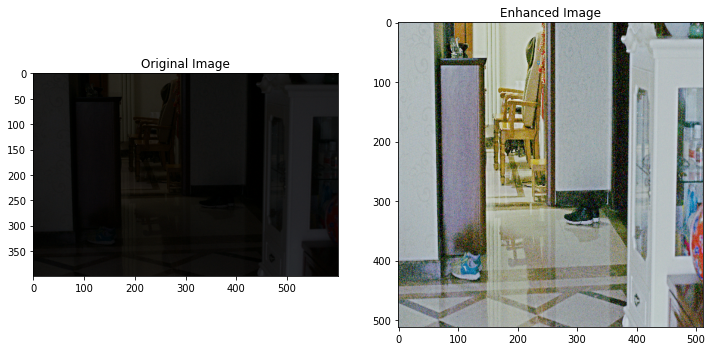

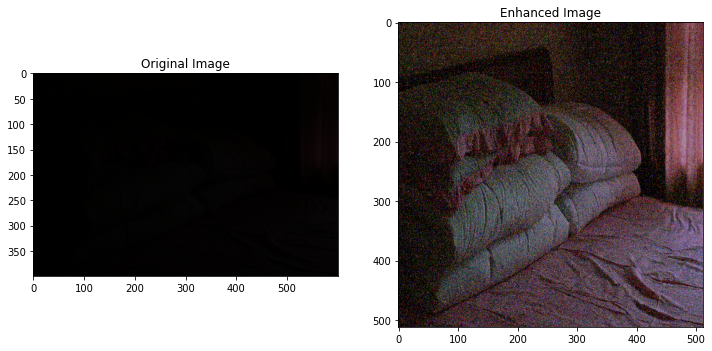

In [5]:
import random

random.shuffle(image_files)
for image_file in image_files[:5]:
    # Testing on resized images because I'm gareeb
    image, enhanced = trainer.infer_gpu(image_file, image_size=512)
    plot_result(image, enhanced)